## Observations and Insights 

In [235]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_data = merge_data.rename(columns={"Tumor Volume (mm3)":"Tumor Volume"})                             
len(merged_data["Mouse ID"])
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_data = merged_data.drop_duplicates(["Mouse ID", "Timepoint"])
newer_data = pd.DataFrame(new_data, columns = ['Tumor Volume', "Drug Regimen"])
drug_data = newer_data.groupby("Drug Regimen")
drug_df = drug_data.count()


In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = newer_data.groupby(["Drug Regimen"])['Tumor Volume'].mean()
median = newer_data.groupby(["Drug Regimen"])['Tumor Volume'].median()
var = newer_data.groupby(["Drug Regimen"])['Tumor Volume'].var()
std = newer_data.groupby(["Drug Regimen"])['Tumor Volume'].std()
sem = newer_data.groupby(["Drug Regimen"])['Tumor Volume'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_df["Mean"] = mean
drug_df["Median"] = median
drug_df["Variance"] = var
drug_df["Standard Deviation"] = std
drug_df["SEM"] = sem

drug_df

,Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Test')

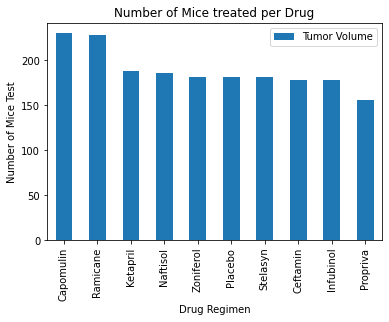

In [243]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plot_df = drug_data.count()
plot_df = plot_df.sort_values("Tumor Volume", ascending=False)

plot_df.plot.bar()
plt.title("Number of Mice treated per Drug")
plt.ylabel("Number of Mice Test")

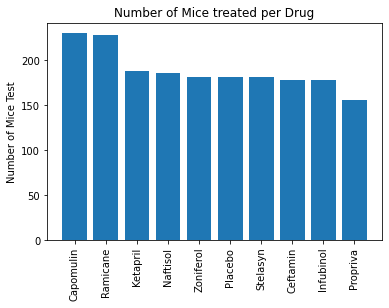

In [244]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
superplan = plot_df.reset_index()
plt.bar(superplan["Drug Regimen"], superplan["Tumor Volume"])
plt.xticks(rotation=90)
plt.title("Number of Mice treated per Drug")
plt.ylabel("Number of Mice Test")
plt.show() 

<AxesSubplot:ylabel='Sex'>

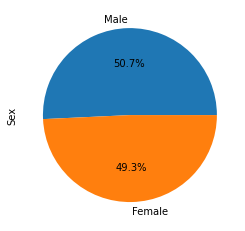

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_gender = new_data["Sex"].value_counts()
plot_gender.plot.pie(autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x7ff9cc5ac650>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

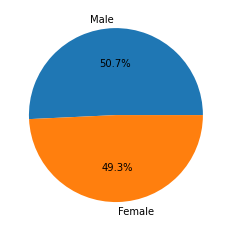

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Male", "Female"]
fig1, ax1 = plt.subplots()
ax1.pie(plot_gender, autopct='%1.1f%%', labels=label)


## Quartiles, Outliers and Boxplots

In [248]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Propriva')]
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Naftisol')]
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Stelasyn')]
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Zoniferol')]
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Ketapril')]
merged_data = merged_data[~merged_data['Drug Regimen'].str.contains('Placebo')]


final_four = merged_data.sort_values("Timepoint", ascending=False).drop_duplicates(["Mouse ID"])
more_df = final_four.groupby(["Drug Regimen", "Mouse ID"])
more_df.sum()




Age_months  Weight (g)  Timepoint  Tumor Volume  \
Drug Regimen Mouse ID                                                    
Capomulin    b128               9          22         45     38.982878   
             b742               7          21         45     38.939633   
             f966              16          17         20     30.485985   
             g288               3          19         45     37.074024   
             g316              22          22         45     40.159220   
...                           ...         ...        ...           ...   
Ramicane     s508               1          17         45     30.276232   
             u196              18          25         45     40.667713   
             w678               5          24          5     43.166373   
             y449              19          24         15     44.183451   
             z578              11          16         45     30.638696   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                     2  
             b742                     0  
             f966                     0  
             g288                     1  
             g316                     2  
...                                 ...  
Ramicane     s508                     0  
             u196                     3  
             w678                     0  
             y449                     0  
             z578                     0  

[100 rows x 5 columns]

In [249]:
# Create empty list to fill with tumor vol data (for plotting)
one_df = merged_data.sort_values("Timepoint", ascending=False).drop_duplicates(["Mouse ID"])
Capomulin = one_df[one_df['Drug Regimen'].str.contains('Capomulin')]
Ramicane = one_df[one_df['Drug Regimen'].str.contains('Ramicane')]
Infubinol = one_df[one_df['Drug Regimen'].str.contains('Infubinol')]
Ceftamin = one_df[one_df['Drug Regimen'].str.contains('Ceftamin')]

Ceftamindf = Ceftamin["Tumor Volume"]
Capomulindf = Capomulin["Tumor Volume"]
Ramicanedf = Ramicane["Tumor Volume"]
Infubinoldf = Infubinol["Tumor Volume"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
[Q1, Q2, Q3] = Ceftamindf.quantile([0.25,0.5,0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
OutliersCep = Ceftamindf[(Ceftamindf < lower_range) | (Ceftamindf > upper_range)]

[Q1, Q2, Q3] = Capomulindf.quantile([0.25,0.5,0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
OutliersCap = Capomulindf[(Capomulindf < lower_range) | (Capomulindf > upper_range)]


[Q1, Q2, Q3] = Ramicanedf.quantile([0.25,0.5,0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
OutliersRam = Ramicanedf[(Ramicanedf < lower_range) | (Ramicanedf > upper_range)]


[Q1, Q2, Q3] = Infubinoldf.quantile([0.25,0.5,0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
OutliersInf = Infubinoldf[(Infubinoldf < lower_range) | (Infubinoldf > upper_range)]

print(f"No outliers in three data sets, and one in Infubinoldf: {OutliersInf}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

No outliers in three data sets, and one in Infubinoldf: 669    36.321346
Name: Tumor Volume, dtype: float64


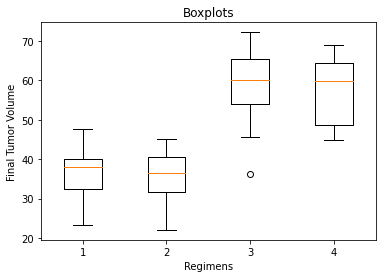

In [257]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
ax = plt.axes()

plt.boxplot((Capomulindf, Ramicanedf, Infubinoldf, Ceftamindf)) 
plt.title("Boxplots")
plt.xlabel("Regimens")
plt.ylabel("Final Tumor Volume")
plt.show()

#ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['A', 'B'], loc='upper right')



## Line and Scatter Plots

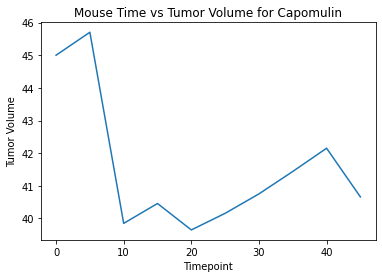

In [250]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_mouse = merged_data[merged_data['Mouse ID'].str.contains('v923')]
Cap_tumor = single_mouse["Tumor Volume"]
Cap_time = single_mouse["Timepoint"]


fig = plt.figure()
ax = plt.axes()
ax.plot(Cap_time, Cap_tumor);


plt.title("Mouse Time vs Tumor Volume for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()


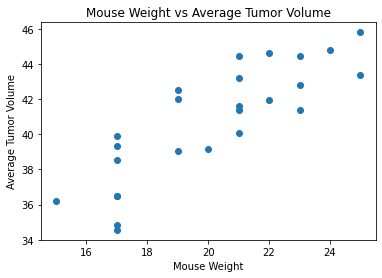

In [254]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weightdf = Capomulin["Weight (g)"]
average_tumor = merged_data[merged_data['Drug Regimen'].str.contains('Capomulin')]
more_average = average_tumor.groupby("Mouse ID")
mostaverage = more_average.mean("Tumor Volume")
most_average = mostaverage.reset_index()

weight = most_average["Weight (g)"]
tumorvol = most_average["Tumor Volume"]



plt.scatter(weight, tumorvol);
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()




In [253]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weightdf = Capomulin["Weight (g)"]
average_tumor = merged_data[merged_data['Drug Regimen'].str.contains('Capomulin')]
more_average = average_tumor.groupby("Mouse ID")
mostaverage = more_average.mean("Tumor Volume")
most_average = mostaverage.reset_index()

weight = most_average["Weight (g)"]
tumorvol = most_average["Tumor Volume"]

corr = pearsonr(weight, tumorvol)
corr

#(slope, intercept, rvalue, pvalue, stderr) = stats.lingregress()


(0.8419363424694716, 1.3225722434712883e-07)